In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import validation_curve, learning_curve, cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from yellowbrick.model_selection import LearningCurve, ValidationCurve

import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import time
import matplotlib
matplotlib.rc('figure', figsize=[10,5])

# random state
rs = 142

cv=5

# sizes for learning curves
train_sizes = np.linspace(0.2, 1.0, 9)
print(train_sizes)

[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


<h2>Data Import, Cleaning, and Setup</h2>

In [2]:
# import datasets
x_data, y_data = make_classification(n_samples=2000, n_features=30, n_informative=20, n_redundant=0, class_sep=2, random_state=rs)
x_data_df = pd.DataFrame(x_data, columns=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26", "27", "28", "29","30"])
y_data_df = pd.DataFrame(y_data)

In [3]:
pd.set_option("display.max_rows", None)
print(x_data_df.info())
print(x_data_df.describe())
x_data_df.head(75)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       2000 non-null   float64
 1   2       2000 non-null   float64
 2   3       2000 non-null   float64
 3   4       2000 non-null   float64
 4   5       2000 non-null   float64
 5   6       2000 non-null   float64
 6   7       2000 non-null   float64
 7   8       2000 non-null   float64
 8   9       2000 non-null   float64
 9   10      2000 non-null   float64
 10  11      2000 non-null   float64
 11  12      2000 non-null   float64
 12  13      2000 non-null   float64
 13  14      2000 non-null   float64
 14  15      2000 non-null   float64
 15  16      2000 non-null   float64
 16  17      2000 non-null   float64
 17  18      2000 non-null   float64
 18  19      2000 non-null   float64
 19  20      2000 non-null   float64
 20  21      2000 non-null   float64
 21  22      2000 non-null   float64
 22  

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,-1.009652,-0.159327,1.247781,0.975233,0.766363,-0.417748,0.130277,-0.361052,1.709918,7.540284,...,-3.799834,-0.064129,-0.249816,-5.304354,3.471665,-1.213104,-3.969837,-1.126570,-1.200219,3.173113
1,-0.581484,-1.109579,-2.126369,0.232048,2.766778,-0.606788,-0.198466,-1.717051,3.447845,-1.271142,...,-2.184351,-7.236498,-2.063581,5.936321,-1.224053,-0.272533,-4.246809,0.223879,1.501173,2.757069
2,-0.851186,0.486384,1.345721,0.621488,2.980424,-0.109953,2.261345,-1.101450,4.847767,4.965148,...,2.285250,1.153467,-1.601517,0.186668,1.283778,0.913124,3.385701,0.182672,0.363190,3.264528
3,1.201657,0.559316,4.132806,1.798928,-3.665910,-1.579966,1.502948,-0.174745,-2.866096,3.762838,...,-2.401177,0.722908,0.186410,-3.904607,4.797188,0.482612,-1.480468,-0.284038,0.355765,1.669820
4,0.435521,-0.280626,-7.948527,-0.878013,-0.107939,0.319578,1.290281,1.329770,0.412591,-3.374271,...,1.255469,-6.023423,-0.381140,1.409702,-0.734644,0.765694,-2.274546,0.078312,-0.242418,-0.147709
5,0.633331,-0.433546,1.349448,-1.818516,-5.335485,0.111075,7.021169,0.359997,-3.821925,-0.808152,...,-1.699194,1.813519,0.219112,-3.043020,-0.487517,0.700169,1.829643,-0.697993,0.184152,1.344853
6,1.093781,0.297312,3.091891,0.884268,-4.871835,1.379773,2.810460,1.269138,-0.194778,6.313234,...,-1.484368,2.575692,0.338110,1.316769,3.859477,0.457387,1.485909,1.676494,-0.186474,0.726960
7,0.629397,0.602187,2.417265,0.580075,-3.893326,-1.167243,-0.249523,-1.130096,0.235059,4.118329,...,0.151240,5.048459,0.016172,0.994181,-0.803107,-1.359243,-1.890124,0.485467,-0.386607,4.900562
8,-0.119284,0.435369,1.072889,-0.460693,3.396514,-0.173649,-5.691507,-1.277774,-2.126135,3.288509,...,4.601560,-1.296633,-1.475286,-1.819809,2.296249,0.297535,0.022603,0.464516,0.297615,0.294541
9,0.428283,-1.496754,4.794620,1.145895,-0.683102,-2.270865,-0.868445,1.888388,1.527067,7.256523,...,3.023508,-0.992060,0.183663,-2.802654,4.149634,-1.439533,5.428775,-1.882348,0.649982,3.957712


In [4]:
print(y_data_df.info())
print(y_data_df.describe())
y_data_df.head(75)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB
None
                 0
count  2000.000000
mean      0.500000
std       0.500125
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       1.000000


,0
0,0
1,1
2,1
3,0
4,1
5,0
6,0
7,0
8,1
9,1


In [5]:
print(len(y_data_df[(y_data_df[0]==1)]))
print(len(y_data_df[(y_data_df[0]==0)]))

1000
1000


In [6]:
# split into train, validation and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = rs, shuffle = True)
y_train.dtype

dtype('int64')

In [7]:
def plot_learning_curve(estimator, name, X, y, train_sizes):
    lw=2

    plt.title("Learning Curves for " + name)
    plt.ylim(0.0, 1.1)
    plt.xlabel("Training instances")
    plt.ylabel("Accuracy Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=8, train_sizes=train_sizes, scoring="accuracy", return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.plot(train_sizes, train_scores_mean, 'o-', color="darkorange",
                 label="Training score", lw=lw)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="darkorange", lw=lw)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="navy",
             label="Cross-validation score", lw=lw)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

    # Plot n_samples vs fit_times
    plt.plot(train_sizes, fit_times_mean, 'o-')
    plt.fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.2)
    plt.xlabel("Training instances")
    plt.ylabel("fit_times (s)")
    plt.title("Scalability of the model for " + name)
    plt.show()

    # Plot fit_time vs score
    plt.plot(fit_times_mean, test_scores_mean, 'o-')
    plt.fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2)
    plt.xlabel("fit_times (s)")
    plt.ylabel("Accuracy Score")
    plt.title("Performance of the model for " + name)
    plt.show()


<h2>Decision Tree</h2>

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Max Depth Range: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]
Train Scores Mean:
[0.78609375 0.83640625 0.88       0.91828125 0.94546875 0.965
 0.9784375  0.98671875 0.991875   0.9946875  0.99578125 0.9971875
 0.99890625 0.99984375 1.         1.         1.         1.
 1.         1.        ]
Train Scores Std:
[0.00633535 0.00182217 0.010535   0.00188798 0.00332926 0.0032551
 0.00498043 0.00324007 0.0032998  0.00332926 0.00347985 0.00294812
 0.00153093 0.0003125  0.         0.         0.         0.
 0.         0.        ]
Validation Scores Mean:
[0.774375 0.82625  0.86375  0.875    0.8975   0.89375  0.89875  0.90375
 0.890625 0.89875  0.896875 0.890625 0.890625 0.886875 0.888125 0.888125
 0.888125 0.888125 0.888125 0.888125]
Validation Scores Std:
[0.02846324 0.00728869 0.01056971 0.01169268 0.01286954 0.01734305
 0.01785357 0.0186874  0.02146946 0.0225     0.01789728 0.01688657
 0.01568738 0.01610512 0.01536026 0.01536026 0.01536026 0.01536026
 0.01

[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished


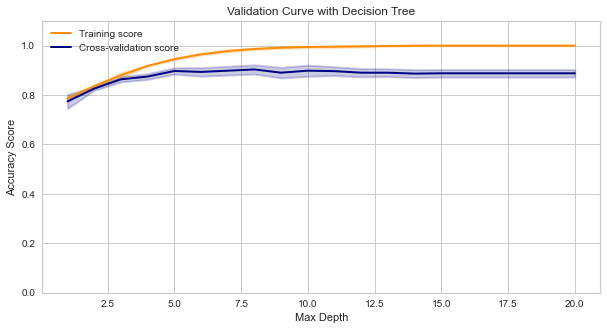

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


range(1, 21)
Leaf Size Range: range(1, 21)
Train Scores Mean:
[1.         0.98265625 0.97640625 0.96875    0.96453125 0.95609375
 0.95265625 0.94515625 0.94140625 0.93609375 0.93359375 0.9303125
 0.92671875 0.92328125 0.9221875  0.91953125 0.9171875  0.9128125
 0.911875   0.910625  ]
Train Scores Std:
[0.         0.00159344 0.00193901 0.00300553 0.00390937 0.00332926
 0.00397133 0.00380814 0.00422164 0.00650646 0.00792112 0.00681795
 0.0053537  0.00477522 0.00451776 0.00366439 0.00389059 0.00485633
 0.00490137 0.00510151]
Validation Scores Mean:
[0.888125 0.895    0.900625 0.898125 0.903125 0.899375 0.89375  0.89125
 0.89125  0.88875  0.88625  0.886875 0.88375  0.879375 0.878125 0.87875
 0.878125 0.876875 0.87375  0.8675  ]
Validation Scores Std:
[0.01536026 0.0157619  0.02617549 0.01807104 0.02279323 0.0157371
 0.01800608 0.01837117 0.01716191 0.02106537 0.02179449 0.01804941
 0.01761125 0.01707063 0.01734305 0.01889527 0.01778781 0.00939581
 0.0075519  0.00960143]


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished


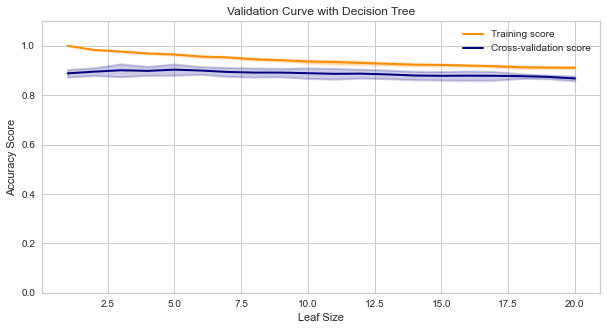

In [ ]:
# Plot cross validation curves for Max Depth and Leaf Size hyperparameters

#### Max Depth
param_range = np.linspace(1, 20, 20)
print(param_range)
train_scores, val_scores = validation_curve(
    DecisionTreeClassifier(random_state = rs), x_train, y_train, param_name="max_depth", 
    param_range=param_range, n_jobs=8,
    scoring='accuracy', verbose=1, cv=cv
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
print("Max Depth Range:", param_range)
print("Train Scores Mean:")
print(train_scores_mean)
print("Train Scores Std:")
print(train_scores_std)
print("Validation Scores Mean:")
print(val_scores_mean)
print("Validation Scores Std:")
print(val_scores_std)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.ylim(0.0, 1.1)
lw=2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, val_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, val_scores_mean -val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


#### Leaf Size
param_range = range(1,21)
print(param_range)
train_scores, val_scores = validation_curve(
    DecisionTreeClassifier(random_state = rs), x_train, y_train, param_name="min_samples_leaf", 
    param_range=param_range, n_jobs=8,
    scoring='accuracy', verbose=1, cv=cv
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
print("Leaf Size Range:", param_range)
print("Train Scores Mean:")
print(train_scores_mean)
print("Train Scores Std:")
print(train_scores_std)
print("Validation Scores Mean:")
print(val_scores_mean)
print("Validation Scores Std:")
print(val_scores_std)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("Leaf Size")
plt.ylabel("Accuracy Score")
plt.ylim(0.0, 1.1)
lw=2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, val_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


# # hyperparameter tuning
param_grid = {'max_depth': range(1, 21), 'min_samples_leaf': range(1, 21)}
tuned_clf = GridSearchCV(estimator = DecisionTreeClassifier(random_state = rs), param_grid = param_grid, cv=cv)

start_time = time.time()
tuned_clf.fit(x_train, y_train)
training_time = time.time() - start_time
start_time = time.time()
tuned_clf.predict(x_test)
testing_time = time.time() - start_time
best_score = tuned_clf.best_score_
best_params = tuned_clf.best_params_


# # plot learning curve for best params
tuned_clf = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'], random_state=rs)
plot_learning_curve(tuned_clf, "Decision Tree", x_data, y_data, train_sizes)

print("The optimal value of Max Depth was ", best_params['max_depth'], ", while the optimal value of Leaf Size was ", best_params['min_samples_leaf'], ".")
print("The Performance of the Decision Tree classifier was ", best_score, " with the optimized values for the max depth and leaf size hyperparameters.")


<h2>Neural Networks</h2>

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Plot cross validation curve for Hidden Layer Size 

#### Hidden Layer Size
param_range = range(1,21,5)
print(param_range)
train_scores, val_scores = validation_curve(
    MLPClassifier(max_iter=20, random_state = rs), x_train, y_train, param_name="hidden_layer_sizes", 
    param_range=param_range, n_jobs=8,
    scoring='f1', verbose=1, cv=cv
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
print("Hidden Layer Sizes:", param_range)
print("Train Scores Mean:")
print(train_scores_mean)
print("Train Scores Std:")
print(train_scores_std)
print("Validation Scores Mean:")
print(val_scores_mean)
print("Validation Scores Std:")
print(val_scores_std)

plt.title("Validation Curve for Neural Network")
plt.xlabel("Hidden Layer Size")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.1)
lw=2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, val_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, val_scores_mean -val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


# # hyperparameter tuning
param_grid = {'hidden_layer_sizes': range(1, 21, 5)}
tuned_clf = GridSearchCV(estimator = MLPClassifier(max_iter=20, random_state = rs), param_grid = param_grid, cv=cv)

start_time = time.time()
tuned_clf.fit(x_train, y_train)
training_time = time.time() - start_time
start_time = time.time()
tuned_clf.predict(x_test)
testing_time = time.time() - start_time
best_score = tuned_clf.best_score_
best_params = tuned_clf.best_params_


# # plot learning curve for best params
tuned_clf = MLPClassifier(max_iter=20, hidden_layer_sizes=best_params['hidden_layer_sizes'], random_state=rs)
plot_learning_curve(tuned_clf, "Neural Network", x_data, y_data, train_sizes)

print("The optimal value of Hidden Layer Sizes was ", best_params['hidden_layer_sizes'], ".")
print("The Performance of the Neural Network classifier was ", best_score, " with the optimized value for the hidden layer size hyperparameter.")


In [ ]:
# Plot cross validation curve for Max Depth and Leaf Size

#### Max Depth
param_range = range(1,5)
print(param_range)
train_scores, val_scores = validation_curve(
    GradientBoostingClassifier(random_state = rs), x_train, y_train, param_name="max_depth", 
    param_range=param_range, n_jobs=8,
    scoring='f1', verbose=1, cv=cv
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
print("Max Depth Range:", param_range)
print("Train Scores Mean:")
print(train_scores_mean)
print("Train Scores Std:")
print(train_scores_std)
print("Validation Scores Mean:")
print(val_scores_mean)
print("Validation Scores Std:")
print(val_scores_std)

plt.title("Validation Curve with Gradient Boosting")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.1)
lw=2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, val_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, val_scores_mean -val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


#### Leaf Size
param_range = range(1, 5)
print(param_range)
train_scores, val_scores = validation_curve(
    GradientBoostingClassifier(random_state = rs), x_train, y_train, param_name="min_samples_leaf", 
    param_range=param_range, n_jobs=8,
    scoring='f1', verbose=1, cv=cv
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
print("Leaf Size Range:", param_range)
print("Train Scores Mean:")
print(train_scores_mean)
print("Train Scores Std:")
print(train_scores_std)
print("Validation Scores Mean:")
print(val_scores_mean)
print("Validation Scores Std:")
print(val_scores_std)

plt.title("Validation Curve with Gradient Boosting")
plt.xlabel("Leaf Size")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.1)
lw=2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, val_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


# # hyperparameter tuning
param_grid = {'max_depth': range(1,5), 'min_samples_leaf': range(1, 5)}
tuned_clf = GridSearchCV(estimator = GradientBoostingClassifier(random_state = rs), param_grid = param_grid, cv=cv)

start_time = time.time()
tuned_clf.fit(x_train, y_train)
training_time = time.time() - start_time
start_time = time.time()
tuned_clf.predict(x_test)
testing_time = time.time() - start_time
best_score = tuned_clf.best_score_
best_params = tuned_clf.best_params_


# # plot learning curve for best params
tuned_clf = GradientBoostingClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'], random_state=rs)
plot_learning_curve(tuned_clf, "Gradient Boosting", x_data, y_data, train_sizes)

print("The optimal value of Max Depth was ", best_params['max_depth'], ", while the optimal value of Leaf Size was ", best_params['min_samples_leaf'], ".")
print("The Performance of the Gradient Boosting classifier was ", best_score, " with the optimized values for the max depth and leaf size hyperparameters.")
